# Import libraries and dataset

In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from stop_words import get_stop_words
import pprint

data = pd.read_csv("train_nlp.csv")


data

,text,label
0,putangina na gets ko yung partnership haha pwe...,0
1,nagugutom ako punyeta,0
2,punyeta para kanino ba talaga kayo,0
3,ulol manigas ka,1
4,putangina mo di sapat yung pakyu pakyu lang,1
...,...,...
11105,error talaga putangina,0
11106,ay ang tanga lang ng peg ko,0
11107,putangina bakit ganun yung story niya what the...,0
11108,sa twitter ko pa talaga dinala pagiging tarant...,0


## Train Test Split 80 20

In [2]:
# Split data into features (X) and labels (y)
X = data['text']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize TFIDF vectorizer and fit XGBOOST

In [3]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [4]:
model_xgb = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42)

# Train the classifier on the TF-IDF transformed training data
model_xgb.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model_xgb.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(rep)

Accuracy: 0.8451845184518452
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1261
           1       0.82      0.83      0.82       961

    accuracy                           0.85      2222
   macro avg       0.84      0.84      0.84      2222
weighted avg       0.85      0.85      0.85      2222



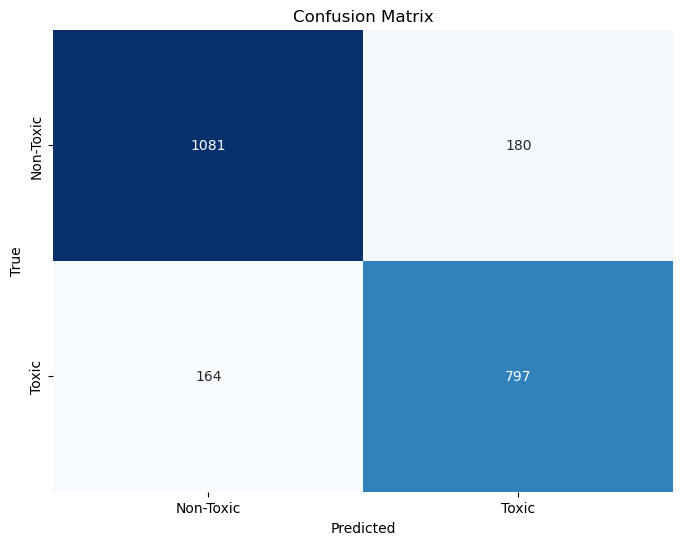

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Toxic', 'Toxic'],
            yticklabels=['Non-Toxic', 'Toxic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
test_text = ["gago mahal na mahal kita"]


test_text_tfidf = tfidf_vectorizer.transform(test_text)


test_predictions = model_xgb.predict(test_text_tfidf)

# Print the predicted labels (1 for toxic, 0 for non-toxic)
if(test_predictions==1):
    print("You are toxic")
else:
    print("You are not Toxic")

You are not Toxic
